In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

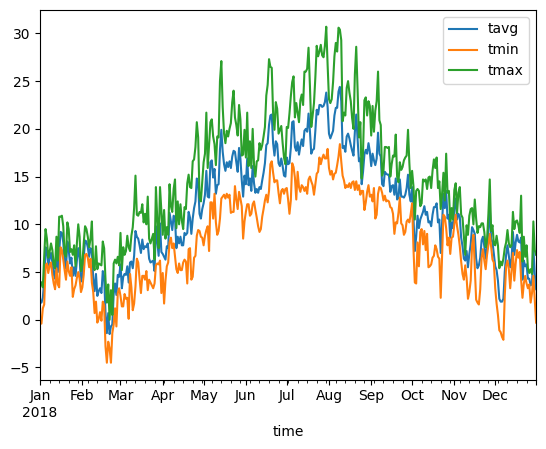

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('country_coordinates_manual.csv')

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Iterate over each row in the CSV file
for index, row in coordinates.iterrows():
    # Create Point for each location
    location = Point(row['latitude'], row['longitude'], row['elevation'])

    # Get daily data for 2018
    data = Daily(location, start, end)
    data = data.fetch()

    # Plot line chart including average, minimum and maximum temperature
    data.plot(y=['tavg', 'tmin', 'tmax'])
    plt.title(f"Weather Data for {row['location_name']}")
    plt.show()

KeyError: 'latitude'

In [4]:
print(coordinates.columns)

Index(['Country', 'Latitude', 'Longitude'], dtype='object')


No valid temperature data for Afghanistan.
No valid temperature data for Albania.
No valid temperature data for Algeria.


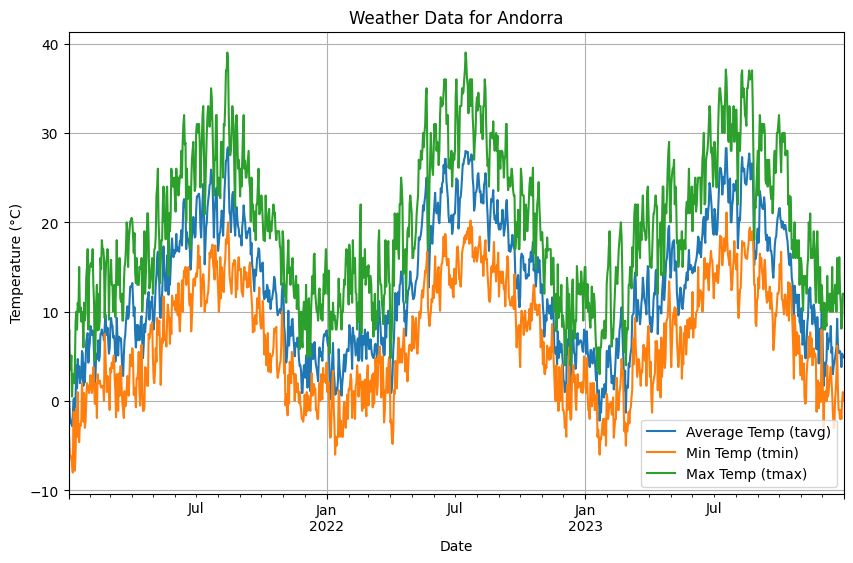

No valid temperature data for Angola.
No valid temperature data for Argentina.
No valid temperature data for Armenia.
No valid temperature data for Australia.


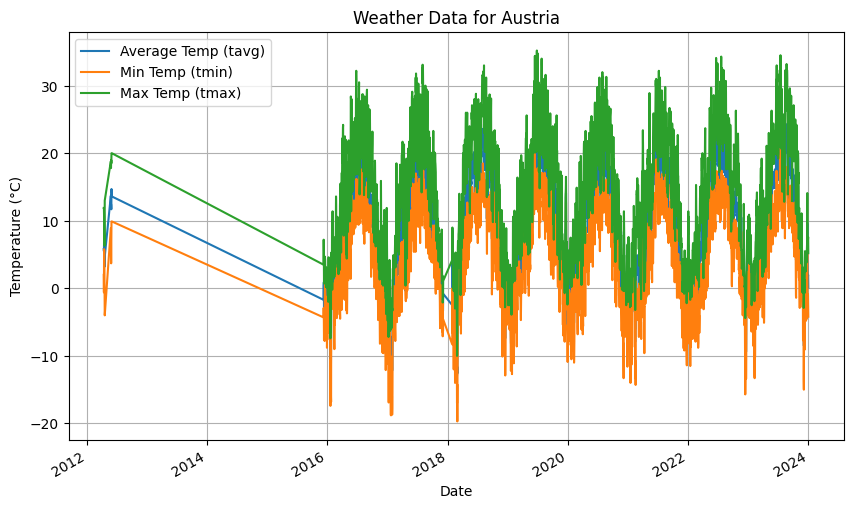

No valid temperature data for Azerbaijan.


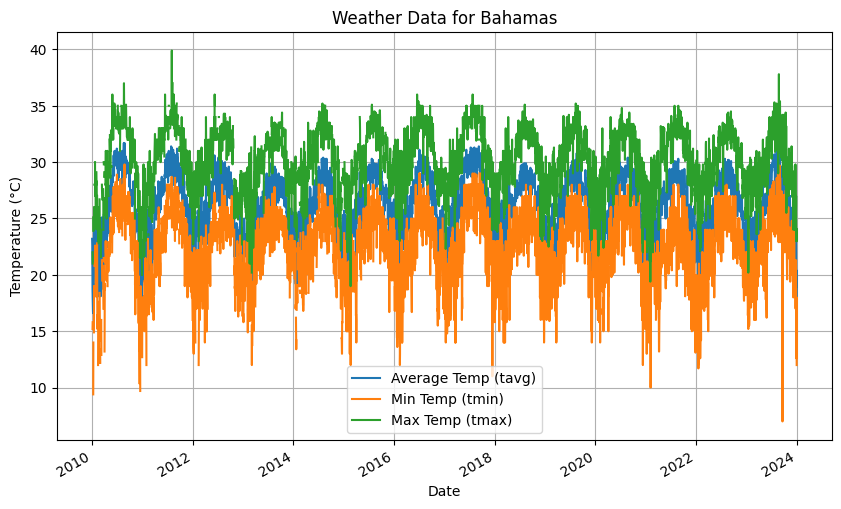

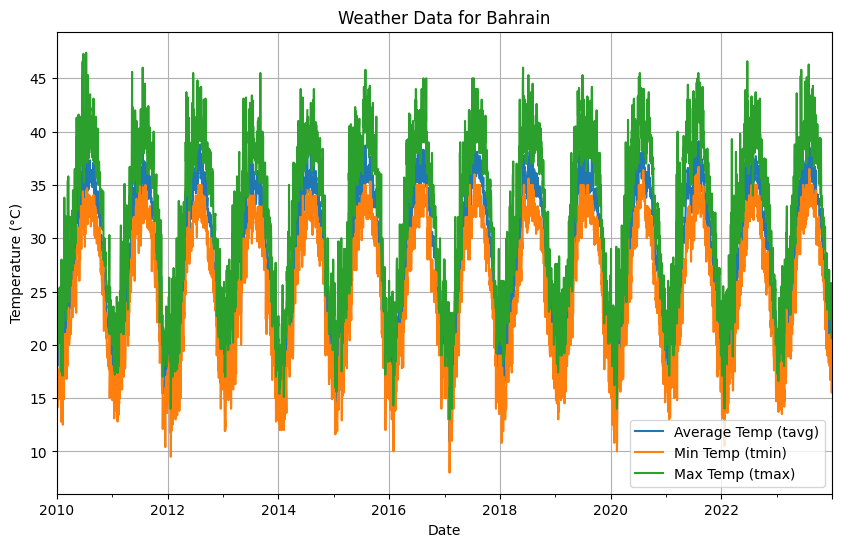

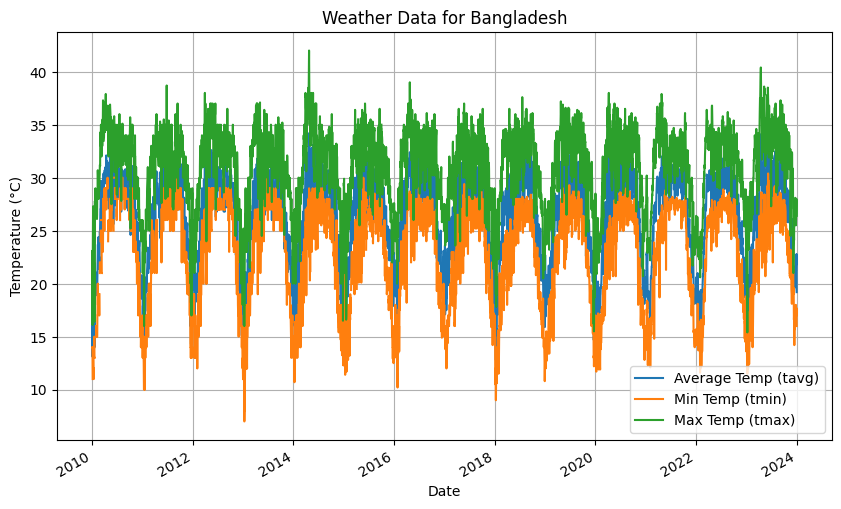

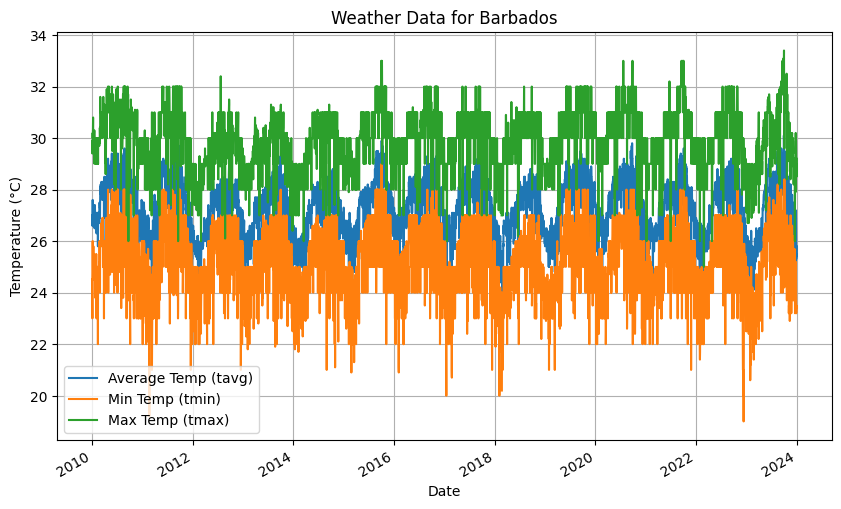

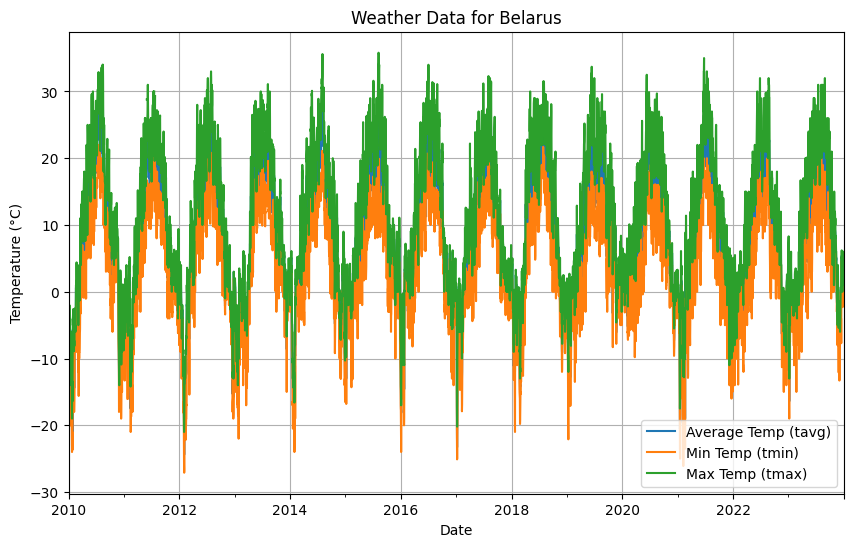

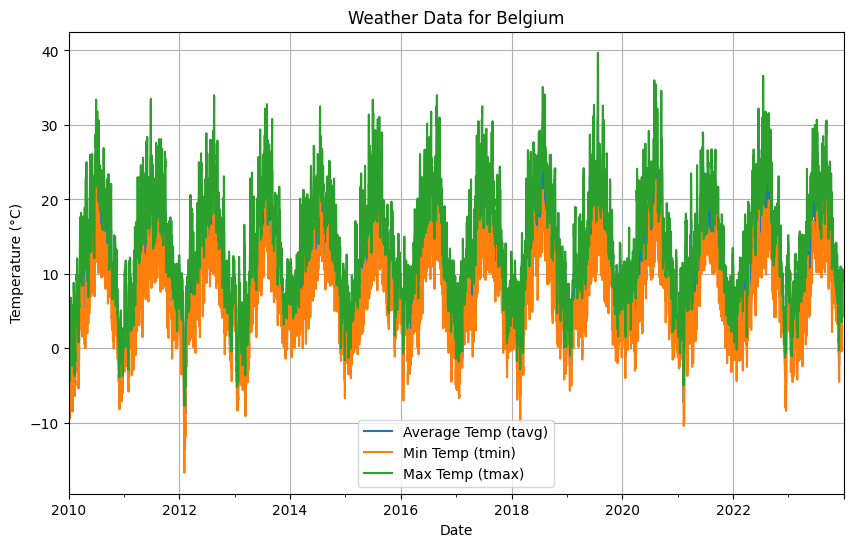

No valid temperature data for Belize.


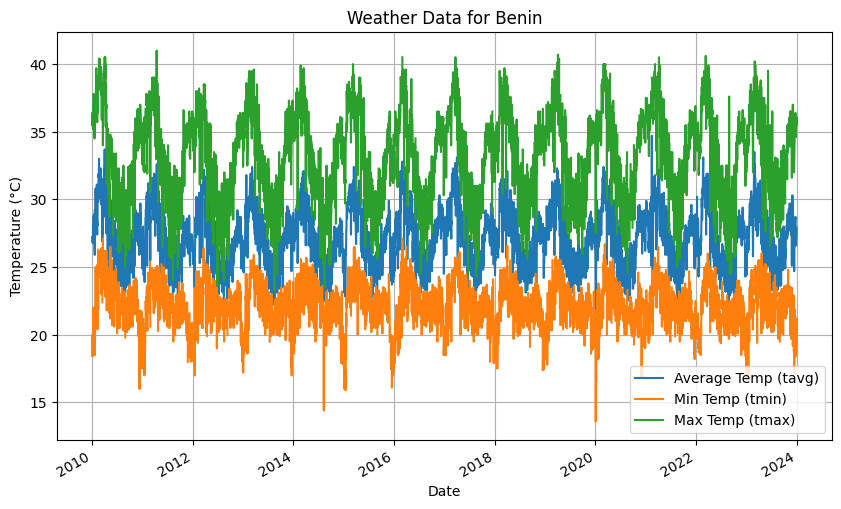

No valid temperature data for Bhutan.
No valid temperature data for Bolivia.


In [21]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('Data/country_coordinates_manual.csv')

# Set time period
start = datetime(2010, 1, 1)
end = datetime(2023, 12, 31)

for index, row in coordinates.iterrows():
    try:
        # Create Point for each location
        location = Point(row['Latitude'], row['Longitude'])

        # Fetch daily data for 2018
        data = Daily(location, start, end)
        data = data.fetch()

        # Check and convert temperature columns to numeric
        if all(col in data.columns for col in ['tavg', 'tmin', 'tmax']):
            data[['tavg', 'tmin', 'tmax']] = data[['tavg', 'tmin', 'tmax']].apply(pd.to_numeric, errors='coerce')
            
            # Drop rows where all three temperature columns are NaN
            data = data.dropna(subset=['tavg', 'tmin', 'tmax'], how='all')
            
            if not data.empty:
                data.plot(y=['tavg', 'tmin', 'tmax'], figsize=(10, 6))
                plt.title(f"Weather Data for {row['Country']}")
                plt.xlabel("Date")
                plt.ylabel("Temperature (°C)")
                plt.legend(['Average Temp (tavg)', 'Min Temp (tmin)', 'Max Temp (tmax)'])
                plt.grid(True)
                plt.show()
            else:
                print(f"No valid temperature data for {row['Country']}.")
        else:
            print(f"Required columns missing for {row['Country']}. Data columns: {data.columns}")
    except Exception as e:
        print(f"An error occurred while processing data for {row['Country']}: {e}")

In [25]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('Data/Weather/country_coordinates_manual.csv')

# Set time period
start = datetime(2010, 1, 1)
end = datetime(2023, 12, 31)

# Initialize an empty DataFrame to store the weather data
weather_data = pd.DataFrame()

# Iterate over each row in the CSV file
for index, row in coordinates.iterrows():
    try:
        # Create Point for each location
        location = Point(row['Latitude'], row['Longitude'])

        # Fetch daily data for the specified period
        data = Daily(location, start, end)
        data = data.fetch()

        # Add country information to the data
        data['Country'] = row['Country']
        data['Latitude'] = row['Latitude']
        data['Longitude'] = row['Longitude']

        # Append the data to the weather_data DataFrame
        weather_data = pd.concat([weather_data, data], ignore_index=True)
    except Exception as e:
        print(f"An error occurred while processing data for {row['Country']}: {e}")
        empty_row = pd.DataFrame({
            'Country': [row['Country']],
            'Latitude': [row['Latitude']],
            'Longitude': [row['Longitude']],
            'time': pd.date_range(start=start, end=end)
        })
        weather_data = pd.concat([weather_data, empty_row], ignore_index=True)

# Convert date columns to datetime
weather_data['time'] = pd.to_datetime(weather_data['time'], errors='coerce')

# Display the resulting DataFrame
print(weather_data)

# Save the DataFrame to a CSV file
weather_data.to_csv('weather_data.csv', index=False)

KeyError: 'time'

In [ ]:
import requests
import pandas as pd

url = "https://restcountries.com/v3.1/all"

response = requests.get(url)
data = response.json()

countries = []
for country in data:
    try:
        name = country["name"]["common"]
        capital = country["capital"][0] if "capital" in country and country["capital"] else None
        area = country["area"]
        latlng = country["latlng"]
        countries.append({"Country": name, "Capital": capital, "Area_km2": area, "Latitude": latlng[0], "Longitude": latlng[1]})
    except KeyError:
        continue

countries_df = pd.DataFrame(countries)

countries_df.to_csv("countries_with_coordinates.csv", index=False)

print(countries_df.head())

         Country            Capital  Area_km2   Latitude  Longitude
0  South Georgia  King Edward Point    3903.0 -54.500000 -37.000000
1        Grenada       St. George's     344.0  12.116667 -61.666667
2    Switzerland               Bern   41284.0  47.000000   8.000000
3   Sierra Leone           Freetown   71740.0   8.500000 -11.500000
4        Hungary           Budapest   93028.0  47.000000  20.000000


In [13]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('countries_with_coordinates.csv')

print(coordinates)

# # Set time period
# start = datetime(2018, 1, 1)
# end = datetime(2018, 12, 31)

# for index, row in coordinates.iterrows():
#     try:
#         # Create Point for each location
#         location = Point(row['Latitude'], row['Longitude'])

#         # Fetch daily data for 2018
#         data = Daily(location, start, end)
#         data = data.fetch()

#         # Check and convert temperature columns to numeric
#         if all(col in data.columns for col in ['tavg', 'tmin', 'tmax']):
#             data[['tavg', 'tmin', 'tmax']] = data[['tavg', 'tmin', 'tmax']].apply(pd.to_numeric, errors='coerce')
            
#             # Drop rows where all three temperature columns are NaN
#             data = data.dropna(subset=['tavg', 'tmin', 'tmax'], how='all')
            
#             if not data.empty:
#                 data.plot(y=['tavg', 'tmin', 'tmax'], figsize=(10, 6))
#                 plt.title(f"Weather Data for {row['Country']}")
#                 plt.xlabel("Date")
#                 plt.ylabel("Temperature (°C)")
#                 plt.legend(['Average Temp (tavg)', 'Min Temp (tmin)', 'Max Temp (tmax)'])
#                 plt.grid(True)
#                 plt.show()
#             else:
#                 print(f"No valid temperature data for {row['Country']}.")
#         else:
#             print(f"Required columns missing for {row['Country']}. Data columns: {data.columns}")
#     except Exception as e:
#         print(f"An error occurred while processing data for {row['Country']}: {e}")

           Country            Capital  Area_km2   Latitude   Longitude
0    South Georgia  King Edward Point    3903.0 -54.500000  -37.000000
1          Grenada       St. George's     344.0  12.116667  -61.666667
2      Switzerland               Bern   41284.0  47.000000    8.000000
3     Sierra Leone           Freetown   71740.0   8.500000  -11.500000
4          Hungary           Budapest   93028.0  47.000000   20.000000
..             ...                ...       ...        ...         ...
245        Belgium           Brussels   30528.0  50.833333    4.000000
246         Israel          Jerusalem   20770.0  31.470000   35.130000
247    New Zealand         Wellington  270467.0 -41.000000  174.000000
248      Nicaragua            Managua  130373.0  13.000000  -85.000000
249       Anguilla         The Valley      91.0  18.250000  -63.166667

[250 rows x 5 columns]


In [20]:
import pandas as pd

countries_df = pd.read_csv('countries_with_coordinates.csv')

sorted_countries_df = countries_df.sort_values(by="Country")

sorted_file_path = "countries_sorted_alphabetically.csv"
sorted_countries_df.to_csv(sorted_file_path, index=False)

sorted_file_path

FileNotFoundError: [Errno 2] No such file or directory: 'countries_with_coordinates.csv'

In [19]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Load coordinates from CSV file
coordinates = pd.read_csv('Data/countries_sorted_alphabetically.csv')

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Initialize an empty DataFrame to store the weather data
weather_data = pd.DataFrame()

# Iterate over each row in the CSV file
for index, row in coordinates.iterrows():
    try:
        location = Point(row['Latitude'], row['Longitude'])

        data = Daily(location, start, end)
        data = data.fetch()

        data['Country'] = row['Country']
        data['Latitude'] = row['Latitude']
        data['Longitude'] = row['Longitude']

        weather_data = pd.concat([weather_data, data], ignore_index=True)
    except Exception as e:
        print(f"An error occurred while processing data for {row['Country']}: {e}")
        empty_row = pd.DataFrame({
            'Country': [row['Country']],
            'Latitude': [row['Latitude']],
            'Longitude': [row['Longitude']],
            'time': pd.date_range(start=start, end=end)
        })
        weather_data = pd.concat([weather_data, empty_row], ignore_index=True)

# Convert date columns to datetime
weather_data['time'] = pd.to_datetime(weather_data['time'], errors='coerce')

print(weather_data)

weather_data.to_csv('weather_data.csv', index=False)

KeyboardInterrupt: 

In [26]:
import pandas as pd
from datetime import datetime
from meteostat import Point, Daily

# Load coordinates
coordinates = pd.read_csv('Data/Weather/countries_sorted_alphabetically.csv')

# Time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Initialize DataFrame
weather_data = pd.DataFrame()

# Iterate over coordinates
for index, row in coordinates.iterrows():
    try:
        location = Point(row['Latitude'], row['Longitude'])
        data = Daily(location, start, end).fetch()

        # Add metadata
        data['Country'] = row['Country']
        data['Latitude'] = row['Latitude']
        data['Longitude'] = row['Longitude']

        weather_data = pd.concat([weather_data, data], ignore_index=True)
    except Exception as e:
        print(f"Error for {row['Country']}: {e}")
        # Add a failed record for traceability
        failed_record = pd.DataFrame({
            'Country': [row['Country']],
            'Latitude': [row['Latitude']],
            'Longitude': [row['Longitude']],
            'Failed': [True]
        })
        weather_data = pd.concat([weather_data, failed_record], ignore_index=True)

# Save to CSV
weather_data.to_csv('weather_data.csv', index=False)


In [39]:
import pandas as pd
from datetime import datetime
from meteostat import Point, Daily
import warnings

# Suppress only FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load coordinates from CSV file
coordinates = pd.read_csv('Data/Weather/countries_sorted_alphabetically.csv')

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Initialize an empty DataFrame to store the weather data
weather_data = pd.DataFrame()

# Iterate over each row in the CSV file
for index, row in coordinates.iterrows():
    try:
        # Define location
        location = Point(row['Latitude'], row['Longitude'])

        # Fetch weather data
        data = Daily(location, start, end).fetch()

        # Add metadata
        data['Country'] = row['Country']
        data['Latitude'] = row['Latitude']
        data['Longitude'] = row['Longitude']

        # Append the data
        weather_data = pd.concat([weather_data, data], ignore_index=True)
    except Exception as e:
        print(f"An error occurred while processing data for {row['Country']}: {e}")
        
        # Create an empty DataFrame with consistent columns
        empty_row = pd.DataFrame({
            'time': pd.date_range(start=start, end=end),
            'Country': row['Country'],
            'Latitude': row['Latitude'],
            'Longitude': row['Longitude'],
        })
        weather_data = pd.concat([weather_data, empty_row], ignore_index=True)

# Ensure the 'time' column exists before converting
if 'time' in weather_data.columns:
    weather_data['time'] = pd.to_datetime(weather_data['time'], errors='coerce')

print(weather_data)

# Save to CSV
weather_data.to_csv('weather_data.csv', index=False)


       tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun  \
0      25.1  23.2  28.0   NaN   NaN   62.0  19.8   NaN  1017.0   NaN   
1      24.9  23.0  28.0   NaN   NaN   75.0  17.1   NaN  1016.2   NaN   
2      25.3  23.0  28.0   NaN   NaN   49.0  21.6   NaN  1016.1   NaN   
3      25.6  24.0  28.0   NaN   NaN   72.0  21.9   NaN  1016.3   NaN   
4      25.9  24.8  28.0   NaN   NaN   82.0  20.2   NaN  1017.0   NaN   
...     ...   ...   ...   ...   ...    ...   ...   ...     ...   ...   
35081   0.3  -4.2   3.0   NaN   NaN  324.0   2.9  18.5  1009.4   NaN   
35082  -0.4  -6.2   3.5   NaN   NaN  340.0   4.4  24.1  1013.0   NaN   
35083  -2.8  -6.5   1.2   NaN   NaN  250.0   3.8  22.2  1013.7   NaN   
35084  -1.7  -6.9   1.7   NaN   NaN    0.0   4.5  24.1  1016.3   NaN   
35085  -2.0  -9.0   2.7   NaN   NaN  280.0  16.3  57.4  1018.5   NaN   

             Country   Latitude  Longitude  
0           Anguilla  18.250000 -63.166667  
1           Anguilla  18.250000 -63.166667  


In [36]:
weatherData = pd.read_csv('weather_data.csv')
weatherData

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Country,Latitude,Longitude
0,25.4,23.0,28.2,NaN,NaN,65.0,19.9,NaN,1018.4,NaN,Anguilla,18.250000,-63.166667
1,-26.2,NaN,-21.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antarctica,-90.000000,0.000000
2,25.4,23.6,28.0,NaN,NaN,82.0,18.3,NaN,1018.2,NaN,Antigua and Barbuda,17.050000,-61.800000
3,26.7,25.0,29.0,NaN,NaN,100.0,31.0,NaN,1013.5,NaN,Aruba,12.500000,-69.966667
4,0.2,-0.8,1.1,NaN,NaN,324.0,7.9,18.5,1035.5,NaN,Austria,47.333333,13.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,25.7,22.8,28.9,0.0,0.0,65.0,17.6,NaN,1018.8,NaN,United States Virgin Islands,18.350000,-64.933333
97,7.7,3.7,13.0,0.0,NaN,24.0,11.0,27.8,1023.8,NaN,Vatican City,41.900000,12.450000
98,16.1,15.4,17.0,NaN,NaN,270.0,11.6,NaN,1023.6,NaN,Vietnam,16.166667,107.833333
99,27.9,25.8,28.8,35.1,NaN,354.0,12.0,NaN,1004.6,NaN,Wallis and Futuna,-13.300000,-176.200000


In [38]:
import pandas as pd
from datetime import datetime
from meteostat import Point, Daily
import warnings

# Suppress only FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load coordinates from CSV file
coordinates = pd.read_csv('Data/Weather/countries_sorted_alphabetically.csv')

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Initialize an empty DataFrame to store the aggregated weather data
aggregated_weather_data = pd.DataFrame()

# Iterate over each row in the CSV file
for index, row in coordinates.iterrows():
    try:
        # Define location
        location = Point(row['Latitude'], row['Longitude'])

        # Fetch weather data
        data = Daily(location, start, end).fetch()

        # Add metadata
        data['Country'] = row['Country']
        data['Latitude'] = row['Latitude']
        data['Longitude'] = row['Longitude']

        # Aggregate data (e.g., mean of numeric columns)
        aggregated_data = data.mean(numeric_only=True).to_frame().T

        # Add metadata to aggregated data
        aggregated_data['Country'] = row['Country']
        aggregated_data['Latitude'] = row['Latitude']
        aggregated_data['Longitude'] = row['Longitude']

        # Append the aggregated data
        aggregated_weather_data = pd.concat([aggregated_weather_data, aggregated_data], ignore_index=True)
    except Exception as e:
        print(f"An error occurred while processing data for {row['Country']}: {e}")
        # Add an empty row for failed data
        aggregated_weather_data = pd.concat([aggregated_weather_data, pd.DataFrame({
            'Country': [row['Country']],
            'Latitude': [row['Latitude']],
            'Longitude': [row['Longitude']],
            'Failed': [True]
        })], ignore_index=True)

# Save to CSV
aggregated_weather_data.to_csv('aggregated_weather_data.csv', index=False)

print(aggregated_weather_data)


      Latitude  Longitude         Country      tavg      tmin      tmax  prcp  \
0    33.000000       65.0     Afghanistan       NaN       NaN       NaN   NaN   
1    41.000000       20.0         Albania       NaN       NaN       NaN   NaN   
2    28.000000        3.0         Algeria       NaN       NaN       NaN   NaN   
3   -14.333333     -170.0  American Samoa       NaN       NaN       NaN   NaN   
4    42.500000        1.5         Andorra       NaN       NaN       NaN   NaN   
..         ...        ...             ...       ...       ...       ...   ...   
245  24.500000      -13.0  Western Sahara       NaN       NaN       NaN   NaN   
246  15.000000       48.0           Yemen       NaN       NaN       NaN   NaN   
247 -15.000000       30.0          Zambia       NaN       NaN       NaN   NaN   
248 -20.000000       30.0        Zimbabwe       NaN       NaN       NaN   NaN   
249  60.116667       19.9   Åland Islands  7.112603  3.012055  10.31863   NaN   

     snow        wdir      